In [1]:
import os

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import TD3
from stable_baselines3 import DQN

from stable_baselines3 import DDPG
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecMonitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor

from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), "timesteps")
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose >= 1:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose >= 1:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

In [3]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1, file_name: str = None):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "Best Models", file_name)
        self.best_reward = -np.inf
        self.prev_mean_reward = 0.0

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), "episodes")
          if len(x) > 0:
              # Mean training reward over the last 10 episodes
              last_ep = x[-1]
              last_reward = y[-1] 
              mean_reward = np.mean(y[-10:])
              delta_mearn_reward = mean_reward - self.prev_mean_reward
              self.prev_mean_reward = mean_reward
              if self.verbose >= 1:
                print(f"Num timesteps: {self.num_timesteps} - Ep: {last_ep}")
                print(f"Best reward: {self.best_reward:.2f} - Last reward per episode: {last_reward:.2f} - Mean reward last 10 episode: {mean_reward:.2f} - Delta mean: {delta_mearn_reward:.2f}")

              # New best model, you could save the agent here
              if last_reward > self.best_reward:
                  self.best_reward = last_reward
                  # Example for saving best model
                  if self.verbose >= 1:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

In [5]:
log_dir = "tmpa/"
x, y = ts2xy(load_results(log_dir), "episodes")
print(x, y)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [4]:
log_dir = "tmpa/"
x, y = ts2xy(load_results(log_dir), "timesteps")
print(x, y)

[ 106  311  490  923 1341 1432 1932 2432] [ 1.995764   3.022075   2.943315  17.342731  21.881638   0.6985977
 20.86144   67.297264 ]


In [13]:
def make_env(env_id: str, rank: int, seed: int = 0, render_mode = None, action_type = "Box", observation_type = "Continous", reward_function = "Absolute", task = "InvertedCartPole"):
    """
    Utility function for multiprocessed env.

    :param env_id: the environment ID
    :param num_env: the number of environments you wish to have in subprocesses
    :param seed: the inital seed for RNG
    :param rank: index of the subprocess
    """
    def _init():
        env = gym.make(env_id, render_mode=render_mode, action_type = action_type, observation_type = observation_type, reward_function = reward_function, task = task) #gym.make(env_id, render_mode="human")
        env.reset(seed=seed + rank)
        return env
    set_random_seed(seed)
    return _init

if __name__ == "__main__":
    # log_dir = "tmpa/"
    # os.makedirs(log_dir, exist_ok=True)

    env_id = "CartPole-v1"
    num_cpu = 1  # Number of processes to use
    total_timesteps=100_000 #

    log_dir = os.path.join('Training', 'Save Models')
    os.makedirs(log_dir, exist_ok=True)

    # Create the vectorized environment
    # vec_env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
    # vec_env = VecMonitor(vec_env, log_dir)
    env = gym.make(env_id, action_type = "Box", observation_type = "Continous", reward_function = "Absolute", task = "InvertedCartPole")
    env = Monitor(env, log_dir)

    # Stable Baselines provides you with make_vec_env() helper
    # which does exactly the previous steps for you.
    # You can choose between `DummyVecEnv` (usually faster) and `SubprocVecEnv`
    # env = make_vec_env(env_id, n_envs=num_cpu, seed=0, vec_env_cls=SubprocVecEnv)
    callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir, file_name='DDPG_ip_{}_{}'.format(num_cpu, total_timesteps))


    model = DDPG("MlpPolicy", env, verbose=0)
    model.learn(total_timesteps=total_timesteps, progress_bar=True, callback=callback) #250000 callback=callback

    # vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(num_cpu)])
    # env = gym.make(env_id, render_mode="human")
    
    # for _ in range(1000):
    #     obs= vec_env.reset()
    #     done = False
    #     while not done:
    #         action, _states = model.predict(obs)
    #         print(action)
    #         obs, rewards, done, info, _ = vec_env.step(action)
            # vec_env.render()

Output()

Num timesteps: 1000 - Ep: 23

Best reward: -inf - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 3.97

Saving new best model to Training\Save Models\Best Models\DDPG_ip_1_100000

Num timesteps: 2000 - Ep: 50

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 4000 - Ep: 104

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 5000 - Ep: 131

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 6000 - Ep: 158

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 7000 - Ep: 185

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 8000 - Ep: 212

Num timesteps: 9000 - Ep: 239

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 10000 - Ep: 266

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 11000 - Ep: 293

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 12000 - Ep: 320

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 13000 - Ep: 347

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 14000 - Ep: 374

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 15000 - Ep: 401

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 16000 - Ep: 428

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 17000 - Ep: 455

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 18000 - Ep: 482

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 19000 - Ep: 509

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 20000 - Ep: 536

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 21000 - Ep: 563

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 22000 - Ep: 590

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 23000 - Ep: 617

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 24000 - Ep: 644

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 25000 - Ep: 671

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 26000 - Ep: 698

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 27000 - Ep: 725

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 28000 - Ep: 752

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 29000 - Ep: 779

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 30000 - Ep: 806

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 31000 - Ep: 833

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 32000 - Ep: 860

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 33000 - Ep: 888

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 34000 - Ep: 915

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 35000 - Ep: 942

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 36000 - Ep: 969

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 37000 - Ep: 996

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 38000 - Ep: 1023

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 39000 - Ep: 1050

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 40000 - Ep: 1077

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 41000 - Ep: 1104

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 42000 - Ep: 1131

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 43000 - Ep: 1158

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

Num timesteps: 44000 - Ep: 1185

Best reward: 3.97 - Last reward per episode: 3.97 - Mean reward last 10 episode: 3.97 - Delta mean: 0.00

KeyboardInterrupt: 

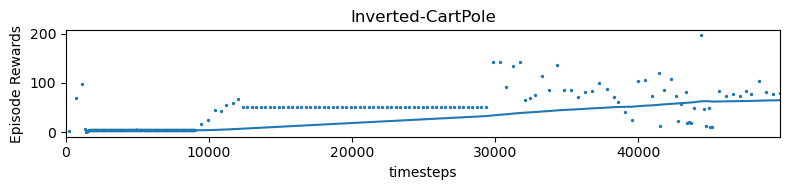

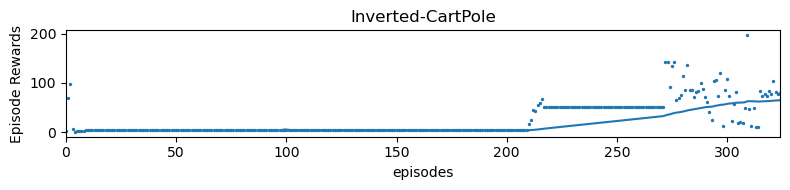

In [6]:
plot_results([log_dir], total_timesteps, results_plotter.X_TIMESTEPS, "Inverted-CartPole")
plt.show()
plot_results([log_dir], total_timesteps, results_plotter.X_EPISODES, "Inverted-CartPole")
plt.show()

In [6]:
# save the model
PPO_Path = os.path.join('Training', 'Save Models', 'PPO_ip_3_500k')
model.save(PPO_Path)

# Save the policy independently from the model
# Note: if you don't save the complete model with `model.save()`
# you cannot continue training afterward
policy = model.policy
PPO_policy_Path = os.path.join('Training', 'Save Policy', 'PPO_ip_3_500k')
policy.save(PPO_policy_Path)

In [11]:
# the saved model does not contain the replay buffer
DDPG_Path = os.path.join('Training', 'Save Models', 'Best Models', 'DDPG_ip_1_50000.zip')
loaded_model = DDPG.load(DDPG_Path)
print(f"The loaded_model has {loaded_model.replay_buffer.size()} transitions in its buffer")

The loaded_model has 0 transitions in its buffer


In [22]:
from stable_baselines3.common.evaluation import evaluate_policy
# Retrieve the environment
env = model.get_env()

# Load the policy independently from the model
PPO_policy_Path = os.path.join('Training', 'Save Policy', 'PPO_ip_3_250k')
saved_policy = PPO.load(PPO_policy_Path)

# Evaluate the loaded policy
mean_reward, std_reward = evaluate_policy(saved_policy, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=418.60 +/- 2.553283775341697e-05


In [12]:
environment_name = 'CartPole-v1'
env = gym.make(environment_name, render_mode="human", action_type = "Box", observation_type = "Continous", reward_function = "Absolute", task = "InvertedCartPole")

episodes = 5
for episodes in range(1, episodes+1):
    obs, _ = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = loaded_model.predict(obs)
        obs, reward, done, truncated, info = env.step(action[0])
        score += reward
    # print('Episode:{} Score:{}'.format(episodes, score))
env.close()

In [78]:
vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(1)]) #num_cpu
vec_env = VecMonitor(vec_env)
obs = vec_env.reset()
obs_2_values = []
for _ in range(500):
    print("obs: " , obs)
    action, _states = model.predict(obs)
    print("action: " , action)
    obs, rewards, dones, info = vec_env.step(action)
    # obs_2_values.append(obs[0][2])
    vec_env.render()

obs:  [[0.        0.        3.1415927 0.       ]]
action:  [[-0.74703765]]
obs:  [[ 0.         -0.14576344  3.1415927  -0.21864517]]
action:  [[-1.]]
obs:  [[-2.9152688e-03 -3.4088540e-01  3.1372197e+00 -5.1132810e-01]]
action:  [[-1.]]
obs:  [[-0.00973298 -0.53594327  3.1269932  -0.80262643]]
action:  [[-1.]]
obs:  [[-0.02045184 -0.7308436   3.1109407  -1.0906538 ]]
action:  [[-1.]]
obs:  [[-0.03506871 -0.9254773   3.0891275  -1.373457  ]]
action:  [[-1.]]
obs:  [[-0.05357826 -1.1197126   3.0616584  -1.6489913 ]]
action:  [[-1.]]
obs:  [[-0.07597251 -1.3133909   3.0286787  -1.9151055 ]]
action:  [[-1.]]
obs:  [[-0.10224033 -1.5063249   2.9903765  -2.1695373 ]]
action:  [[-1.]]
obs:  [[-0.13236682 -1.6983005   2.9469857  -2.4099264 ]]
action:  [[-1.]]
obs:  [[-0.16633284 -1.8890837   2.8987873  -2.6338453 ]]
action:  [[-1.]]
obs:  [[-0.20411451 -2.0784307   2.8461103  -2.838849  ]]
action:  [[-1.]]
obs:  [[-0.24568312 -2.2661033   2.7893333  -3.0225449 ]]
action:  [[-1.]]
obs:  [[-0.29

KeyboardInterrupt: 

In [4]:
vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(num_cpu)])
vec_env = VecMonitor(vec_env)

episodes = 30
for episodes in range(1, episodes+1):
    obs = vec_env.reset()
    done = [False, False, False, False]
    score = 0

    while not done[0]:
        vec_env.render()
        action = model.predict(obs)
        obs, reward, done, truncated, info = vec_env.step(action)
        score += reward
    # print('Episode:{} Score:{}'.format(episodes, score))
vec_env.close()

EOFError: 

In [35]:
vec_env.episode_lengths

array([334])

In [36]:
vec_env.episode_count

44

In [2]:
import os

In [3]:
a = 3
b = 5 
log_dir = os.path.join('Training', 'Save Models', 'Best Models', 'PPO_ip_{}_{}k'.format(a, b))

In [4]:
print(log_dir)

Training\Save Models\Best Models\PPO_ip_3_5k


In [37]:
vec_env.episode_returns

array([63.820053], dtype=float32)

In [70]:
environment_name = 'CartPole-v1'
env = gym.make(environment_name, render_mode="human")

episodes = 30
for episodes in range(1, episodes+1):
    obs = env.reset()
    done = [False, False, False, False]
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        print(n_state)
        score += reward
    # print('Episode:{} Score:{}'.format(episodes, score))
env.close()

In [ ]:
vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(num_cpu)])
vec_env = VecMonitor(vec_env)
obs = vec_env.reset()
obs_2_values = []
for _ in range(100):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    # obs_2_values.append(obs[0][2])
    vec_env.render()
    model.train()

episodes = 30
for episodes in range(1, episodes+1):
    state = vec_env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        print(n_state)
        score += reward
    # print('Episode:{} Score:{}'.format(episodes, score))
env.close()

In [3]:
vec_env = SubprocVecEnv([make_env(env_id, i, render_mode="human") for i in range(num_cpu)])
vec_env = VecMonitor(vec_env)
obs = vec_env.reset()
obs_2_values = []
for _ in range(100):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    # obs_2_values.append(obs[0][2])
    vec_env.render()
    model.train()

In [5]:
vec_env.episode_lengths

array([100,  34, 100, 100])

In [ ]:
env.get_episode_lengths()

In [ ]:
vec_env(env_id = 0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
obs_2_array = np.array(obs_2_values).T

In [ ]:
obs_2_array[2]

In [ ]:
plt.plot(obs_2_array[2])
plt.xlabel('Steps')
plt.ylabel('obs[2]')
plt.title('Value of obs[2] over time')
plt.show()

In [ ]:
# env = gym.make(env_id, render_mode="human")
# # status = env.observation_space.shape[0]
# actions = env.action_space.n

# episodes = 1000
# for episode in range(1, episodes+1):
#     obs = env.reset()
#     done = False
#     score = 0


#     while not done:
#         env.render()
#         action, _states = model.predict(obs)
#         obs, reward, done, truncated, info = env.step(action)
#         score += reward
#     print('Episode:{} Score:{}'.format(episode, score))

In [ ]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level: 0 for no output, 1 for info messages, 2 for debug messages
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), "timesteps")
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose >= 1:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose >= 1:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
# env = gym.make("LunarLanderContinuous-v2")
# env = Monitor(env, log_dir)

env_id = "CartPole-v1"
num_cpu = 4  # Number of processes to use
# Create and wrap the environment
env = gym.make(env_id)
env = Monitor(env, log_dir)


# Add some action noise for exploration
# n_actions = env.action_space.shape[-1]
# action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
# model = TD3("MlpPolicy", env, action_noise=action_noise, verbose=0)
model = PPO("MlpPolicy", env, verbose=0)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Train the agent
timesteps = 1e5
model.learn(total_timesteps=int(timesteps), callback=callback)

plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "TD3 LunarLander")
plt.show()

In [ ]:
env = gym.make('CartPole-v1',render_mode="rgb_array")
status = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
actions

In [ ]:
episodes = 10
for episode in range(1, episodes+1):
    status = env.reset()
    done = False
    score = 0


    while not done:
        env.render()
        action = random.choice([0,1])
        observation, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))

In [ ]:
truncated

In [ ]:
observation, info = env.reset(seed=42)

for _ in range(1000):
    env.render()
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()

